In [1]:
import pandas as pd

#Check readability
file_path = 'uniprotkb_NOT_cc_scl_term_SL_0162_AND_r_2024_02_08.tsv'
df = pd.read_csv(file_path, sep='\t')

#get a list of the possible values in the column Organism (ID)
print(df['Organism (ID)'].unique().shape[0])


[1310613    4839 1344414 ...  766183 1041526 1041527]


In [5]:
#Counts total number of proteins
df = pd.read_csv(file_path, sep='\t')
print('Total count:',df.shape[0])

#Filters the proteins that have something in the 'PDB' column (non NaN)
df = df[df['PDB'].notna()]
print('Proteins with PDB:',df.shape[0])

#Filters protein between 1000 and 50000 of mass
df = df[(df['Mass'] > 1000) & (df['Mass'] < 50000)]
print('Proteins with PDB and less than 50kDa:',df.shape[0])

Total count: 453600
Proteins with PDB: 26253
Proteins with PDB and less than 50kDa: 18697


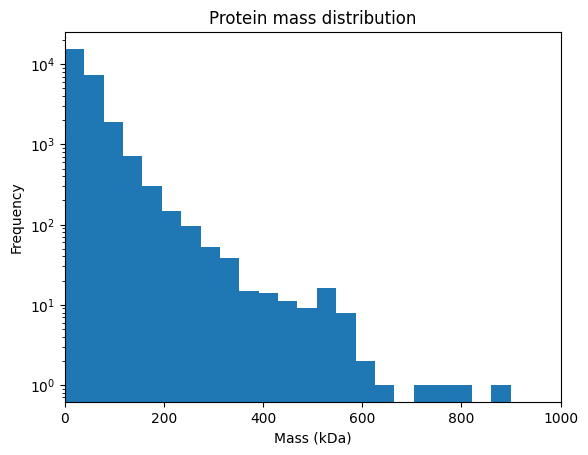

In [6]:
# Make a histogram considering the 'Mass' column with y axis in logscale
import matplotlib.pyplot as plt

df = pd.read_csv(file_path, sep='\t')
df = df[df['PDB'].notna()]
df['Mass'] = df['Mass']/1000
df['Mass'].plot(kind='hist', bins=100, logy=True, title='Protein mass distribution', xlim=(0,1000))
plt.xlabel('Mass (kDa)')
plt.ylabel('Frequency')
plt.show()


In [7]:
#prints the ten rows with more 'Mass'
df = pd.read_csv(file_path, sep='\t')
df = df[df['PDB'].notna()]
df = df.sort_values(by='Mass', ascending
    =False)
print(df[['Entry', 'Mass','PDB']].head(10))

        Entry     Mass                                                PDB
550    A2ASS6  3906488                                              6YJ0;
28240  Q8WZ42  3816030  1BPV;1G1C;1NCT;1NCU;1TIT;1TIU;1TKI;1TNM;1TNN;1...
2744   O01761   894252                                              1FHO;
19760  Q23551   788953                               1KOA;1WIT;1WIU;3UTO;
9913   P20929   772914                                    1ARK;1NEB;6Y17;
42583  O30409   724033           1DNY;2GDW;2GDX;2GDY;2JGP;2K2Q;2MD9;4MRT;
18200  Q09666   629101                                    4DRW;4FTG;4HRG;
26513  Q8IVF2   616629                                              4CN0;
3135   O14686   593389                               3UVK;4ERQ;4Z4P;6O7G;
16752  P98088   585570                               5AJN;5AJO;5AJP;8OV0;


In [3]:
import pandas as pd
file_path = 'uniprotkb_NOT_cc_scl_term_SL_0162_AND_r_2024_02_08.tsv'

#merge all the entries of the column 'PDB' into comma separated string
df = pd.read_csv(file_path, sep='\t')
df = df[df['PDB'].notna()]
print(df.shape[0])
df['PDB'] = df['PDB'].str.strip(';')
df['PDB'] = df['PDB'].str.replace(';',',')
pdb_comma_separated = ','.join(df['PDB'])
pdb_list = pdb_comma_separated.split(',')
print('Total number of PDBs:',len(pdb_list))




Total number of PDBs: 219337


In [9]:
#For each pdb, make a GET request to the following URL: https://data.rcsb.org/rest/v1/core/entry/PDB
import requests
import json
import datetime

now = datetime.datetime.now()

with open(f'pdb_info_{now.strftime("%Y-%m-%d_%H-%M-%S")}.tsv', 'w') as f:
    #write the header
    f.write('PDB\tPubmed_ID\tDeposit_date\tModel_count\tMolecular_weight\tPolymer_type\tModeled_residues\tTotal_residues\n')

    for pdb in pdb_list:
        url = f'https://data.rcsb.org/rest/v1/core/entry/{pdb}'
        response = requests.get(url)
        if response.status_code == 200:
            print(f'PDB {pdb} was found')
        else:
            print(f'PDB {pdb} was not found')

        #get from the response the 'rcsb_accession_info.deposit_date' and print it
        response_json = response.json()

        try:
            pubmed_id = response_json['rcsb_entry_container_identifiers']['pubmed_id']
        except:
            pubmed_id = 'N/A'

        deposit_date = response_json['rcsb_accession_info']['deposit_date']
        deposit_date = deposit_date.split('T')[0]        

        model_count = response_json['rcsb_entry_info']['deposited_model_count']
        molecular_weight = response_json['rcsb_entry_info']['molecular_weight']
        polymer_type = response_json['rcsb_entry_info']['selected_polymer_entity_types']
        modeled_residues = response_json['rcsb_entry_info']['deposited_modeled_polymer_monomer_count']
        total_residues = response_json['rcsb_entry_info']['deposited_polymer_monomer_count']
        coverage = int(modeled_residues/total_residues*100)
        
        #write information into a tab separated file
        f.write(f'{pdb}\t{pubmed_id}\t{deposit_date}\t{model_count}\t{molecular_weight}\t{polymer_type}\t{modeled_residues}\t{total_residues}\t{coverage}\n')



PDB 7UWG was found
PDB 7UXU was found
PDB 8G83 was found
PDB 4K35 was found
PDB 4K3A was found
PDB 5XBZ was found


KeyError: 'pubmed_id'